# GRIP: The Sparks Foundation

# Muhammed Sahal Ibin Ebrahim

# TASK 1 - Prediction using Supervised ML

Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

Reading data from a url

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

Exploring the dataset

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We do not have any null values in our data set, so we can move on to next step.

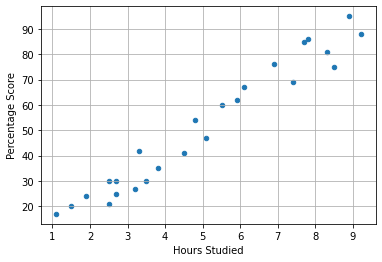

In [8]:
# Plotting the dataset
data.plot(kind='scatter', x='Hours', y='Scores')

plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

##### From the scatter plot, we can observe that there is a linear relationship between "Hours Studied" and "Percentage Score". This can be validated with help of correlation. It gives the strength of association between two variables numerically.

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


## Data Preprocessing

In [10]:
# using iloc function we will divide the data into "features" (inputs) and "labels" (outputs).
X = data.iloc[:,:-1]
y = data.iloc[:,1:]

In [11]:
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [12]:
y.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [13]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Linear Regression Model

In [14]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

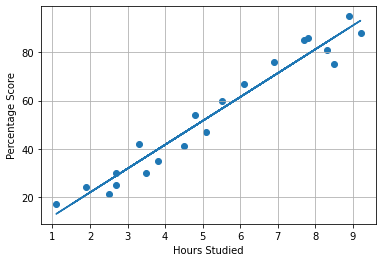

In [16]:
#Model Visualisation

line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.scatter(X_train, y_train)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

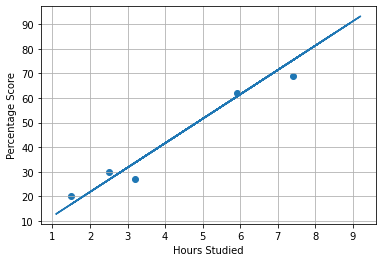

In [17]:
# Plotting for the testing data
plt.scatter(X_test, y_test)
plt.plot(X, line);
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## Making Predictions

In [18]:
# Predicting the scores
y_pred = model.predict(X_test) 


In [19]:
# Comparing Actual vs Predicted
comp = pd.DataFrame({ 'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,Scores 5 20 2 27 19 69 16...,"[[16.884144762398037], [33.73226077948984], [7..."


In [20]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


In [21]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [22]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


## Evaluating the model

We are going to evaluate our trained model by calculating mean absolute error

In [23]:
from sklearn import metrics  

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
